# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I performed an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. I compared the system usage between three large cities: New York City, Chicago, and Washington, DC. I also saw if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, I started by asking questions I wanted to understand about the bike share data. Consider, for example, if I were working for Motivate. What kinds of information would I want to know about in order to make smarter business decisions? If I were a user of the bike-share service, what factors might influence how I would want to use the service?

**Q1:** What the peak days, weekdays or weekends, people use bikeshare system? What the trip duration average in terms of Subscribers or Customers? All of three cities follow the same pattern?

**Q1:** Which season has the more trips duration in average? All of three cities follow the same pattern also?

**Answering these questions let Motivate rethink in the number of bicycles during  days of the week or seasons, and give it a chance to put pricing policy to activate the both subscribers and customers markets.**


<a id='wrangling'></a>
## Data Collection and Wrangling

It's time to collect and explore our data. In this project, I focused on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where I could freely download the trip data:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. I ran the first code cell below to load some packages and functions that I'll be using in my analysis. Then, I completed the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).


In [53]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [54]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
                
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

I noticed in the printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when I get to the actual exploration, I should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data I'm most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [55]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
     
    if city == "Washington":
            return  int(datum["Duration (ms)"]) / 60000 # 1 Minute = 60 SECOND * 1000 MS = 60000 ms
    else:
            return  int(datum["tripduration"]) / 60     # 1 Minute = 60 SECOND
    


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [56]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    if city == "NYC":
        dt = datetime.strptime(datum["starttime"], '%m/%d/%Y %H:%M:%S') #includes ms at the end
        month = dt.month
        hour  = dt.hour
        day_of_week = datetime.strftime(dt,"%A")                   
    elif city == "Chicago":
        dt = datetime.strptime(datum["starttime"], '%m/%d/%Y %H:%M')
        month = dt.month
        hour  = dt.hour
        day_of_week = datetime.strftime(dt,"%A")         
    else:
        dt = datetime.strptime(datum["Start date"], '%m/%d/%Y %H:%M')
        month = dt.month
        hour  = dt.hour
        day_of_week = datetime.strftime(dt,"%A")
    return (month, hour, day_of_week)
    
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [57]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == "Washington":
        if datum["Member Type"] == "Registered":
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    else:
        user_type = datum['usertype']
        
    return user_type

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [58]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        
        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
            new_point['duration'] = duration_in_mins(row, city)            
            new_point['month'], new_point["hour"], new_point["day_of_week"] = time_of_trip(row, city)
            new_point['user_type'] = type_of_user(row, city)
            
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##   
            
            trip_writer.writerow(new_point)
            

In [59]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that I have the data collected and wrangled, I'm ready to start exploring the data. In this section I wrote some code to compute descriptive statistics from the data. I also introduced to the  `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**4a answer**: 

1. New York City has the highest number of trips (276,798).

2. New York City has the highest proportion of trips taken by subscribers (89%).

3. Chicago has the highest proportion of trips taken by customers (24%).

In [60]:
def number_of_trips(filename):
    '''
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    '''
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [61]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

Washington_file = './data/Washington-2016-Summary.csv'
Chicago_file = './data/Chicago-2016-Summary.csv'
NYC_file = './data/NYC-2016-Summary.csv'

Washington_result = number_of_trips(Washington_file)
Chicago_result = number_of_trips(Chicago_file)
NYC_result = number_of_trips(NYC_file)



In [62]:
#Which city has the highest number of trips?
highest_total = max((Washington_result[2]), (Chicago_result[2]), (NYC_result[2]))
#print(highest_total)

if (Washington_result[2]) == highest_total:
    print("Washington has the highest number of trips: " + str(highest_total))
elif (Chicago_result[2]) == highest_total:
    print("Chicago has the highest number of trips: " + str(highest_total))
else:
    print("NYC has the highest number of trips: " + str(highest_total))
    


NYC has the highest number of trips: 276798


In [63]:
#Which city has the highest proportion of trips made by subscribers? 
Washington_sub_prop = ((Washington_result[0]) / (Washington_result[2])) * 100 
Chicago_sub_prop = ((Chicago_result[0]) / (Chicago_result[2])) * 100
NYC_sub_prop = ((NYC_result[0]) / (NYC_result[2])) * 100
highest_sub_prop = max(Washington_sub_prop, Chicago_sub_prop, NYC_sub_prop)
if Washington_sub_prop  == highest_sub_prop:
    print("Washington has the highest proportion of trips made by subscribers: " + str(highest_sub_prop)+ " %")
elif Chicago_sub_prop == highest_sub_prop:
    print("Chicago has the highest proportion of trips made by subscribers: " + str(highest_sub_prop)+ " %")
else:
    print("NYC has the highest proportion of trips made by subscribers: " + str(highest_sub_prop) + " %")


NYC has the highest proportion of trips made by subscribers: 88.83590199351151 %


In [64]:
#Which city has the highest proportion of trips made by short_term customers?
Washington_cust_prop = ((Washington_result[1]) / (Washington_result[2])) *100
Chicago_cust_prop = ((Chicago_result[1]) / (Chicago_result[2])) * 100
NYC_cust_prop = ((NYC_result[1]) / (NYC_result[2])) * 100
highest_cust_prop = max(Washington_cust_prop, Chicago_cust_prop, NYC_cust_prop)
if Washington_cust_prop  == highest_cust_prop:
    print("Washington has the highest proportion of trips made by short_term customers: " + str(highest_cust_prop)  + " %")
elif Chicago_cust_prop == highest_cust_prop:
    print("Chicago has the highest proportion of trips made by short_term customers: " + str(highest_cust_prop) + " %")
else:
    print("NYC has the highest proportion of trips made by short_term customers: " + str(highest_cust_prop) + " %")


Chicago has the highest proportion of trips made by short_term customers: 23.774798630269924 %


Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**4b answer**: 

1. **The average trip lengths** are 16.6, 15.8 and 18.9 minutes for Chicago, NYC and Washington respectively.

2. **The proportion of rides that are longer than 30 minutes** are 8, 7 and 11 percent for Chicago, NYC and Washington, respectively.

In [65]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def total_duration(filename):
    ''' 
    calculate the average trip lengths and the proportion of rides 
    that are longer than 30 minutes
    '''
    with open(filename, 'r') as dur_f:
        reader = csv.DictReader(dur_f)
        trips_count = 0      #Number of total number of trips
        total_dur = 0        #Total time (duration) of all the trips (upto 30 minutes or less)
        longer_trip = 0      #Total number trips longer than 30 mins
        
        for trip in reader:
            trips_count += 1
            total_dur += float(trip['duration'])
            if float(trip['duration']) > 30:
                longer_trip += 1
            
    avg_trip_length = total_dur / trips_count
    proportion_longer_30 = (longer_trip / trips_count) * 100
           
    return (avg_trip_length, proportion_longer_30)

data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']
for data_file in data_files:
    td = total_duration(data_file)
    city = data_file.split('-')[0].split('/')[-1]
    print(city+':')
    print(' Average trip length = '.format(city) + str(td[0]) + ' min')
    print(' Proportion of rides longer than 30 mins = '.format(city) + str(td[1]) + ' %')

Chicago:
 Average trip length = 16.563629368787335 min
 Proportion of rides longer than 30 mins = 8.332062497400562 %
NYC:
 Average trip length = 15.81259299802294 min
 Proportion of rides longer than 30 mins = 7.3024371563378345 %
Washington:
 Average trip length = 18.93287355913721 min
 Proportion of rides longer than 30 mins = 10.83888671109369 %


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**4c answer**: 

**NYC** Subscribers rides are longer on average than Customers rides : 12.2 min

In [66]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def Longer_rides_avg(filename):
    '''
    to find which type of user (Subscribers or Customers) takes longer rides on average.
    '''
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    with open(filename, 'r') as rides_f:
        rider_duration = csv.DictReader(rides_f)
        
        trips_count = 0                #Number of total number of trips
        subscriber_total_dur = 0       #Total time (duration) of trips by subscribers
        customer_total_dur = 0         #Total time (duration) of trips by customers
        
        for trip in rider_duration:
            trips_count += 1
            if (trip['user_type']) == 'Subscriber':
                subscriber_total_dur += float(trip['duration'])
            else:
                customer_total_dur += float(trip['duration'])
        
        avg_subscriber_dur = subscriber_total_dur / trips_count
        avg_customer_dur = customer_total_dur / trips_count
        
        if avg_subscriber_dur > avg_customer_dur:
            print('Subscribers longer rides on average than Customers: ' + str(avg_subscriber_dur) + ' min')
        elif avg_subscriber_dur < avg_customer_dur:
            print('Customers longer rides on average than Subscribers: ' + str(avg_customer_dur) + ' min')
        else:
            print('Customers rides on average equal Subscribers average: ' + str(avg_customer_dur) + ' min')
    
        return

data_file = './data/NYC-2016-Summary.csv'
Longer_rides_avg (data_file)



City: NYC
Subscribers longer rides on average than Customers: 12.15345366175579 min


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. I loaded the library and to generate an example plot.

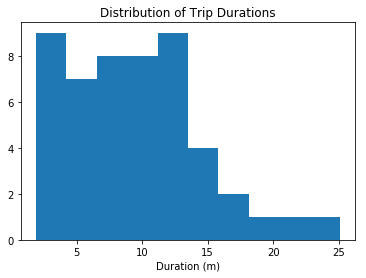

In [67]:
# load library
import matplotlib.pyplot as plt
import numpy as np

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data, bins=10)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

I collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

I used these functions to create a histogram of the trip times for the city you selected in question 4c. Didn't separate the Subscribers and Customers for now: just collected all of the trip times and plot them.


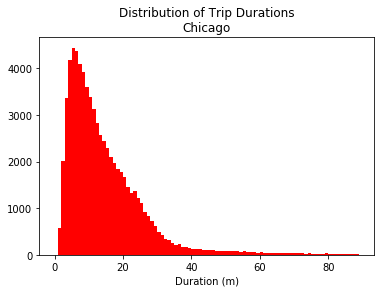

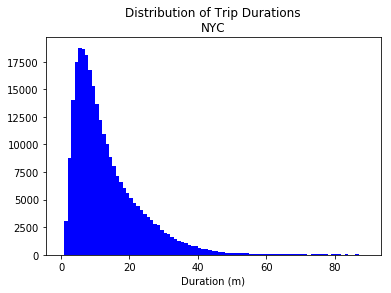

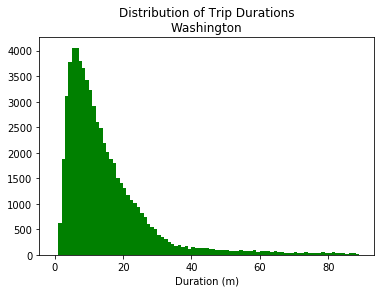

In [68]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
def get_trip_times(filename):
    '''
    Returns all of the trip times as a list to use pyplot functions to generate 
    a histogram of trip times.
    '''
    trip_times = []
    with open(filename) as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            trip_times.append(float(row['duration']))
    return trip_times

data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv',]
colors = ['red', 'blue', 'green']
color_index = 0
for data_file in data_files:
    plt.gcf().clear()
    trip_times = get_trip_times(data_file)
    plt.hist(trip_times, bins = range(0, 90), color = colors[color_index])
    color_index += 1
    city = data_file.split('-')[0].split('/')[-1]
    plt.title('Distribution of Trip Durations\n{}'.format(city))
    plt.xlabel('Duration (m)')
    plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Q5 answer**: 

**1- For subscribers,** the peak of the distribution is in the **5 to 10 minute "bucket".** For **customers,** the peak of the distribution is in the **20 to 25 minute "bucket"** for **NYC only.** For each user type, the distribution is **unimodal**, with a **positive (right) skew**.

**2-** The shape of the histogram for subscribers is unimodal with a skew to the right. For customers, the mode is further to the right than for subscribers, but the shape still remains positively skewed. The tail is much fatter for customers than for subscribers, as well.

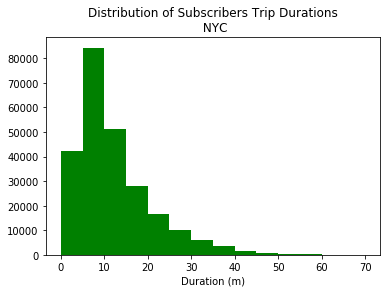

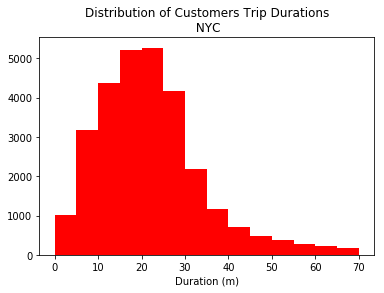

In [69]:
## Use this and additional cells to answer Question 5. ##
filename = './data/NYC-2016-Summary.csv'
def city_trip_times(filename):
    '''
    Returns the distribution of trip times for the Subscribers and Customers in NYC, using 
    the duration that less than 75 minutes, to use the parameters of the .hist() function 
    to plot it.
    '''
    sub_trip_times = []
    cust_trip_times = []
    with open(filename) as nyc_f:
        reader = csv.DictReader(nyc_f)
        for row in reader:
            if (row['user_type']) == 'Subscriber' and (float(row['duration'])) < 75:
                sub_trip_times.append(float(row['duration']))
            elif (row['user_type']) == 'Customer' and (float(row['duration'])) < 75:
                cust_trip_times.append(float(row['duration']))
    
    return (sub_trip_times, cust_trip_times)

plt.gcf().clear()
sub_trip_times,cust_trip_times = city_trip_times(filename) 
plt.hist(sub_trip_times, bins = range(0, 75, 5), color = 'green')
#city = data_file.split('-')[0].split('/')[-1]
plt.title('Distribution of Subscribers Trip Durations\n NYC')
plt.xlabel('Duration (m)')
plt.show()

plt.gcf().clear() 
plt.hist(cust_trip_times, bins = range(0, 75, 5), color = 'red')
#city = data_file.split('-')[0].split('/')[-1]
plt.title('Distribution of Customers Trip Durations\n NYC')
plt.xlabel('Duration (m)')
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, I've performed an initial exploration into the data available. I have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, I have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. I continued the exploration in a direction that I selected. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

These questions which I posed in my answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of my investigation, for that,  I needed to create something other than a histogram, so I consulted the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary). In particular, because I wanted to plot values across a categorical variable (e.g. city, user type), so a bar chart was useful. [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Question 6a**:

How does ridership differ by **season**? Which season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the season?

**6a: answer:**

1- The bars below aggregate number of trips for each city based on whether the rides occur in four seasons. The bars are qualitatively very similar in each city for the same season of trips, with summer season the most common types of trips, for the three cities.

2- It is reasonable to expect that the number of trips in summer is more trips than others for both user types and the three cities, and we find the winter in the all cities is less than other becaus the snow and the heavy rains are preventing the user ride the bikes.

3- the bars show the ratio of Subscriber trips to Customer trips is approximatly constant in for seasons in the three cities, with small diference in NYC, that is reasonable to expect as explained above.

In [70]:
def season_ridership_by_user_type(filename):
    '''
    to calculate ridership difference by season (winter = Jan, Feb, Mar - Spring = Apr, May, Jun - 
    Summer = Jul, Aug, Sept - Autumn = Oct, Nov, Dec) and to know which season has the highest ridership. 
    How Does the ratio of Subscriber trips to Customer trips change depending on the season?
    '''
    with open(filename, 'r') as ridership_f:
        ridership = csv.DictReader(ridership_f)
        sub_win_count = 0
        sub_spr_count = 0
        sub_summ_count = 0
        sub_aut_count = 0
        cust_win_count = 0
        cust_spr_count = 0
        cust_summ_count = 0
        cust_aut_count = 0
        
        for trip in ridership:
            if (trip['user_type']) == 'Subscriber' and (int(trip['month']) == 1 or int(trip['month']) == 2 or int(trip['month']) == 3):
                sub_win_count  += 1 
            elif (trip['user_type']) == 'Subscriber' and (int(trip['month']) == 4 or int(trip['month']) == 5 or int(trip['month']) == 6):
                sub_spr_count  += 1
            elif (trip['user_type']) == 'Subscriber' and (int(trip['month']) == 7 or int(trip['month']) == 8 or int(trip['month']) == 9):
                sub_summ_count  += 1
            elif (trip['user_type']) == 'Subscriber' and (int(trip['month']) == 10 or int(trip['month']) == 11 or int(trip['month']) == 12):
                sub_aut_count  += 1
            elif (trip['user_type']) == 'Customer' and (int(trip['month']) == 1 or int(trip['month']) == 2 or int(trip['month']) == 3):
                cust_win_count  += 1
            elif (trip['user_type']) == 'Customer' and (int(trip['month']) == 4 or int(trip['month']) == 5 or int(trip['month']) == 6):
                cust_spr_count  += 1
            elif (trip['user_type']) == 'Customer' and (int(trip['month']) == 7 or int(trip['month']) == 8 or int(trip['month']) == 9):
                cust_summ_count  += 1
            elif (trip['user_type']) == 'Customer' and (int(trip['month']) == 10 or int(trip['month']) == 11 or int(trip['month']) == 12):
                cust_aut_count  += 1
    
        return ([sub_win_count, sub_spr_count, sub_summ_count, sub_aut_count] , [cust_win_count, cust_spr_count, cust_summ_count, cust_aut_count])




In [71]:
def plot_season_ridership(subscriber, customer, city):
    '''
    Plotting bar chart of 'season_ridership_by_user_type' function using two 
    categorical variables ('User Type' and 'Seasons')
    '''
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    ypos = np.arange(len(seasons))
    plt.gcf().clear()
    plt.xticks(ypos, seasons)
    plt.ylabel('Number of trips')
    plt.title('Season Ridership\n{}'.format(city))
    plt.bar(ypos-0.2, subscriber, width = 0.4, label = 'Subscriber', color = '#000099')
    plt.bar(ypos+0.2, customer, width = 0.4, label = 'Customer', color = 'red')
    plt.legend()
    plt.show()
    return



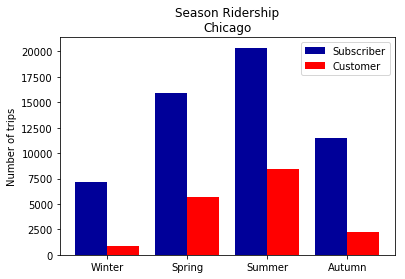

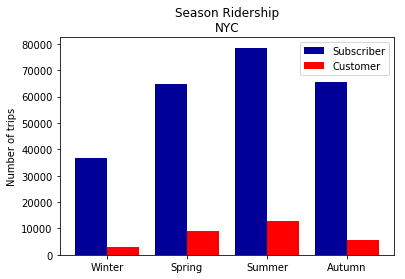

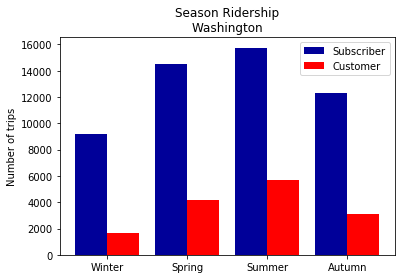

In [72]:
data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv',]
for data_file in data_files:
    city = data_file.split('-')[0].split('/')[-1]
    data = season_ridership_by_user_type(data_file)
    subscriber = data[0]
    customer = data[1]
    plot_season_ridership(subscriber, customer,city)

**Reference for bar plot**: https://www.youtube.com/watch?v=iedmZlFxjfA, visited on 26-10-2018
**Reference for bar color**: https://www.color-hex.com/color/0000ff visited on 26-10-2018

**Question 6b :**

Is the pattern of ridership different on **the weekends** versus **weekdays**? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?

**6b answer :**

1- The bars below show the number of trips on weekdays in the three cities. For the  subscribers, note that all days of the week is more than others days (Saturday and Sunday) in three cities, that indicating most of them work (employee) in fixed places and times.

2- It is reasonable to expect that the number of trips by Customers in the weekends is more than others days in three cities, that indicating most of them are tourists. 

3- The bars of trips duration in the three cities is opposite of numbor of trips, it is longer in all the days of week. The duration bigger than 30 minutes in NYC and Washington because the limit of normal trip is 45 mins in Washington and 3 hours in NYC, that explains the graph.


In [73]:
def days_ridership_dur_by_user_type(filename):
    """
    to calculate ridership difference on the weekends versus weekdays 
    and to know On what days are Subscribers versus Customers most likely to use the system? 
    Does the average duration of rides change depending on the day of the week?
    """
    with open(filename, 'r') as days_f:
        days = csv.DictReader(days_f)
        subscriber_rides = {'Sat' : 0, 'Sun' : 0, 'Mon' : 0, 'Tue' : 0, 'Wed' : 0, 'Thu' : 0, 'Fri' : 0}
        customer_rides = {'Sat' : 0, 'Sun' : 0, 'Mon' : 0, 'Tue' : 0, 'Wed' : 0, 'Thu' : 0, 'Fri' : 0}
        subscriber_durations = {'Sat' : 0, 'Sun' : 0, 'Mon' : 0, 'Tue' : 0, 'Wed' : 0, 'Thu' : 0, 'Fri' : 0}
        customer_durations = {'Sat' : 0, 'Sun' : 0, 'Mon' : 0, 'Tue' : 0, 'Wed' : 0, 'Thu' : 0, 'Fri' : 0}

        for trip in days:
            if trip['day_of_week'] == 'Saturday':
                if trip['user_type'] == 'Subscriber':
                    subscriber_rides['Sat'] += 1
                    subscriber_durations['Sat'] += float(trip['duration'])
                else: 
                    customer_rides['Sat'] += 1
                    customer_durations['Sat'] += float(trip['duration'])
            if trip['day_of_week'] == 'Sunday':
                if trip['user_type'] == 'Subscriber':
                    subscriber_rides['Sun'] += 1
                    subscriber_durations['Sun'] += float(trip['duration'])
                else: 
                    customer_rides['Sun'] += 1
                    customer_durations['Sun'] += float(trip['duration'])
            if trip['day_of_week'] == 'Monday':
                if trip['user_type'] == 'Subscriber':
                    subscriber_rides['Mon'] += 1
                    subscriber_durations['Mon'] += float(trip['duration'])
                else: 
                    customer_rides['Mon'] += 1
                    customer_durations['Mon'] += float(trip['duration'])
            if trip['day_of_week'] == 'Tuesday':
                if trip['user_type'] == 'Subscriber':
                    subscriber_rides['Tue'] += 1
                    subscriber_durations['Tue'] += float(trip['duration'])
                else: 
                    customer_rides['Tue'] += 1
                    customer_durations['Tue'] += float(trip['duration'])
            if trip['day_of_week'] == 'Wednesday':
                if trip['user_type'] == 'Subscriber':
                    subscriber_rides['Wed'] += 1
                    subscriber_durations['Wed'] += float(trip['duration'])
                else: 
                    customer_rides['Wed'] += 1
                    customer_durations['Wed'] += float(trip['duration'])
            if trip['day_of_week'] == 'Thursday':
                if trip['user_type'] == 'Subscriber':
                    subscriber_rides['Thu'] += 1
                    subscriber_durations['Thu'] += float(trip['duration'])
                else: 
                    customer_rides['Thu'] += 1
                    customer_durations['Thu'] += float(trip['duration'])
            if trip['day_of_week'] == 'Friday':
                if trip['user_type'] == 'Subscriber':
                    subscriber_rides['Fri'] += 1
                    subscriber_durations['Fri'] += float(trip['duration'])
                else: 
                    customer_rides['Fri'] += 1
                    customer_durations['Fri'] += float(trip['duration'])
    
    subscriber_dur_avg = {'Sat' : 0, 'Sun' : 0, 'Mon' : 0, 'Tue' : 0, 'Wed' : 0, 'Thu' : 0, 'Fri' : 0}
    customer_dur_avg = {'Sat' : 0, 'Sun' : 0, 'Mon' : 0, 'Tue' : 0, 'Wed' : 0, 'Thu' : 0, 'Fri' : 0}
    for key,value in subscriber_durations.items():
        subscriber_dur_avg[key] = value/subscriber_rides[key]
        
    for key,value in customer_durations.items():
        customer_dur_avg[key] = value/customer_rides[key]        
            
                    
    return (subscriber_rides, customer_rides, subscriber_dur_avg, customer_dur_avg)

In [1]:
def dict_to_list(dic):
    dictlist = []
    for key, value in dic.items():
        temp = [key,value]
        dictlist.append(value)
    return dictlist

In [75]:
def plot_days_of_week_trips(subscriber, customer, city):
    '''
    Plotting bar chart of 'days_ridership_dur_by_user_type' function using two 
    categorical variables ('User Type' and 'day of week')
    '''
    Days=['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
    ypos = np.arange(len(Days))
    plt.gcf().clear()
    plt.xticks(ypos, Days)
    plt.ylabel('Number of trips')
    plt.title('Days of Week Trips Number\n{}'.format(city))
    sub_list = dict_to_list(subscriber)
    cus_list = dict_to_list(customer)
    plt.bar(ypos-0.2,sub_list, width=0.4, label='Subscriber', color = '#000099')
    plt.bar(ypos+0.2,cus_list, width=0.4, label='Customer', color = 'red')
    plt.legend()
    plt.show()
    return

In [76]:
def plot_days_of_week_duration(subscriber, customer, city):
    '''
    Plotting bar chart of 'days_ridership_dur_by_user_type' function using two 
    categorical variables ('User Type' and 'day of week')
    '''
    Days=['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
    ypos = np.arange(len(Days))
    plt.gcf().clear()
    plt.xticks(ypos, Days)
    plt.ylabel('Trips Duration (m)')
    plt.title('Days of Week Trips Duration Avg\n{}'.format(city))
    sub_list = dict_to_list(subscriber)
    cus_list = dict_to_list(customer)
    plt.bar(ypos-0.2,sub_list, width=0.4, label='Subscriber', color = '#000099')
    plt.bar(ypos+0.2,cus_list, width=0.4, label='Customer', color = 'red')
    plt.legend()
    plt.show()
    return


City: Chicago


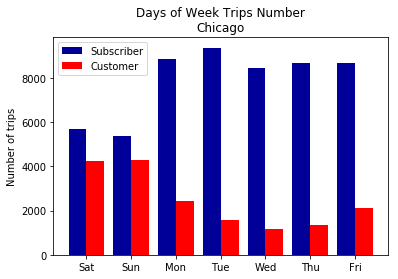

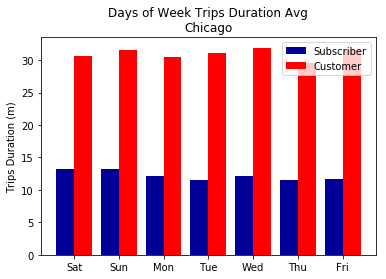


City: NYC


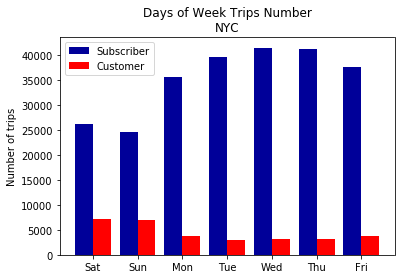

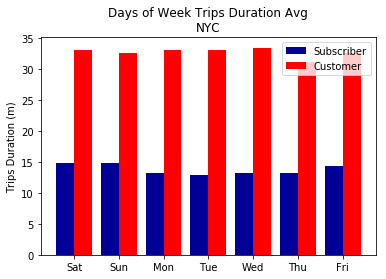


City: Washington


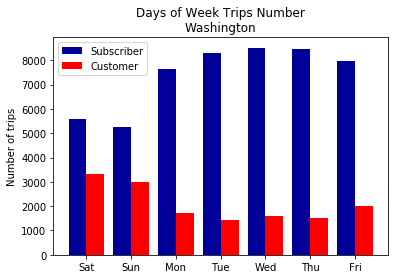

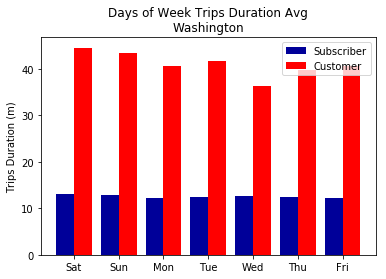

In [77]:
data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv',]
for data_file in data_files:
    city = data_file.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    data = days_ridership_dur_by_user_type(data_file)
    sub_trips = data[0]
    cust_trips = data[1]
    sub_dur = data[2]
    cust_dur = data[3]
    plot_days_of_week_trips(sub_trips, cust_trips, city)
    plot_days_of_week_duration(sub_dur, cust_dur, city)

# <a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 

**I recently conducted a study on the gaps between expectations and perceptions as part of my MBA studies. My analysis was somewhat limited about the services in my library, but it showed conclusively the extent to which data science is capable to measure the clients satisfaction clearly. Data analysis techniques helped me to analyze the questionnaire and abstracting the results.**

**I would like to delve into the data analysis to pursue it as a new field. It would be interesting to know where I would most likely find these jobs.**


In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0